In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

C:\Users\johno\AppData\Local\Temp\ipykernel_20328\1212966580.py:6: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\johno\AppData\Local\Temp\ipykernel_20328\1212966580.py:7: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


# Data Understanding / Preparation  

# Section 1. Exploring Datasets

In [2]:
# Using an example dataset determine file encoding format to ensure we can read this date into a dataframe
with open("data/ProdVolumeQuarters.csv") as file:
    print(file)

<_io.TextIOWrapper name='data/ProdVolumeQuarters.csv' mode='r' encoding='cp1252'>


In [3]:
# Reviewing this datafile to view observations and features
df = pd.read_csv ("data/ProdVolumeQuarters.csv")
df.shape

(4, 59)

In [4]:
# list all the features of the datset
print (df.columns.values)

['freq' 'indic_bt' 'nace_r2' 's_adj' 'unit' 'geo\\TIME_PERIOD' '2010-Q1 '
 '2010-Q2 ' '2010-Q3 ' '2010-Q4 ' '2011-Q1 ' '2011-Q2 ' '2011-Q3 '
 '2011-Q4 ' '2012-Q1 ' '2012-Q2 ' '2012-Q3 ' '2012-Q4 ' '2013-Q1 '
 '2013-Q2 ' '2013-Q3 ' '2013-Q4 ' '2014-Q1 ' '2014-Q2 ' '2014-Q3 '
 '2014-Q4 ' '2015-Q1 ' '2015-Q2 ' '2015-Q3 ' '2015-Q4 ' '2016-Q1 '
 '2016-Q2 ' '2016-Q3 ' '2016-Q4 ' '2017-Q1 ' '2017-Q2 ' '2017-Q3 '
 '2017-Q4 ' '2018-Q1 ' '2018-Q2 ' '2018-Q3 ' '2018-Q4 ' '2019-Q1 '
 '2019-Q2 ' '2019-Q3 ' '2019-Q4 ' '2020-Q1 ' '2020-Q2 ' '2020-Q3 '
 '2020-Q4 ' '2021-Q1 ' '2021-Q2 ' '2021-Q3 ' '2021-Q4 ' '2022-Q1 '
 '2022-Q2 ' '2022-Q3 ' '2022-Q4 ' '2023-Q1 ']


In [5]:
# Drop features unneeded as part of cleaning the dataset
df = df.drop(['freq', 'indic_bt', 'nace_r2', 's_adj', 'unit'], axis = 1)
print(list(df.columns))

['geo\\TIME_PERIOD', '2010-Q1 ', '2010-Q2 ', '2010-Q3 ', '2010-Q4 ', '2011-Q1 ', '2011-Q2 ', '2011-Q3 ', '2011-Q4 ', '2012-Q1 ', '2012-Q2 ', '2012-Q3 ', '2012-Q4 ', '2013-Q1 ', '2013-Q2 ', '2013-Q3 ', '2013-Q4 ', '2014-Q1 ', '2014-Q2 ', '2014-Q3 ', '2014-Q4 ', '2015-Q1 ', '2015-Q2 ', '2015-Q3 ', '2015-Q4 ', '2016-Q1 ', '2016-Q2 ', '2016-Q3 ', '2016-Q4 ', '2017-Q1 ', '2017-Q2 ', '2017-Q3 ', '2017-Q4 ', '2018-Q1 ', '2018-Q2 ', '2018-Q3 ', '2018-Q4 ', '2019-Q1 ', '2019-Q2 ', '2019-Q3 ', '2019-Q4 ', '2020-Q1 ', '2020-Q2 ', '2020-Q3 ', '2020-Q4 ', '2021-Q1 ', '2021-Q2 ', '2021-Q3 ', '2021-Q4 ', '2022-Q1 ', '2022-Q2 ', '2022-Q3 ', '2022-Q4 ', '2023-Q1 ']


In [6]:
# It was observed that column headers included whitespace, clean column headers by stripping trailing whitespace
df = df.rename(columns=lambda x: x.strip())

In [7]:
# list all the features of the datset
print(list(df.columns))

['geo\\TIME_PERIOD', '2010-Q1', '2010-Q2', '2010-Q3', '2010-Q4', '2011-Q1', '2011-Q2', '2011-Q3', '2011-Q4', '2012-Q1', '2012-Q2', '2012-Q3', '2012-Q4', '2013-Q1', '2013-Q2', '2013-Q3', '2013-Q4', '2014-Q1', '2014-Q2', '2014-Q3', '2014-Q4', '2015-Q1', '2015-Q2', '2015-Q3', '2015-Q4', '2016-Q1', '2016-Q2', '2016-Q3', '2016-Q4', '2017-Q1', '2017-Q2', '2017-Q3', '2017-Q4', '2018-Q1', '2018-Q2', '2018-Q3', '2018-Q4', '2019-Q1', '2019-Q2', '2019-Q3', '2019-Q4', '2020-Q1', '2020-Q2', '2020-Q3', '2020-Q4', '2021-Q1', '2021-Q2', '2021-Q3', '2021-Q4', '2022-Q1', '2022-Q2', '2022-Q3', '2022-Q4', '2023-Q1']


In [8]:
# Rename some column names to ease further manipulation
df = df.rename (columns={'geo\TIME_PERIOD': 'GEO', '2010-Q1': '2010Q1', '2010-Q2': '2010Q2'})
print(list(df.columns))
df.head()

['GEO', '2010Q1', '2010Q2', '2010-Q3', '2010-Q4', '2011-Q1', '2011-Q2', '2011-Q3', '2011-Q4', '2012-Q1', '2012-Q2', '2012-Q3', '2012-Q4', '2013-Q1', '2013-Q2', '2013-Q3', '2013-Q4', '2014-Q1', '2014-Q2', '2014-Q3', '2014-Q4', '2015-Q1', '2015-Q2', '2015-Q3', '2015-Q4', '2016-Q1', '2016-Q2', '2016-Q3', '2016-Q4', '2017-Q1', '2017-Q2', '2017-Q3', '2017-Q4', '2018-Q1', '2018-Q2', '2018-Q3', '2018-Q4', '2019-Q1', '2019-Q2', '2019-Q3', '2019-Q4', '2020-Q1', '2020-Q2', '2020-Q3', '2020-Q4', '2021-Q1', '2021-Q2', '2021-Q3', '2021-Q4', '2022-Q1', '2022-Q2', '2022-Q3', '2022-Q4', '2023-Q1']


,GEO,2010Q1,2010Q2,2010-Q3,2010-Q4,2011-Q1,2011-Q2,2011-Q3,2011-Q4,2012-Q1,...,2020-Q4,2021-Q1,2021-Q2,2021-Q3,2021-Q4,2022-Q1,2022-Q2,2022-Q3,2022-Q4,2023-Q1
0,AT,97.8,98.9,97.1,96.0,96.8,99.9,98.5,101.3,98.7,...,123.2,126.7,127.7,125.9,126.6,131.8,132.6,129.4,130.6,:
1,BE,101.0,102.7,102.9,97.5,106.5,106.0,106.2,106.7,105.6,...,96.2,99.8,98.2,97.8,96.9,99.3,99.0,99.3,99.3,:
2,IE,99.8,98.9,93.0,85.0,79.0,76.3,78.3,81.1,77.4,...,140.3,110.0,123.1,131.8,140.6,135.5,131.5,129.1,125.1 p,:
3,NO,78.5,79.8,80.1,79.3,79.6,81.3,80.2,85.2,86.3,...,116.7,117.8,116.8,118.2,121.3,123.2,124.1,123.0,123.9,123.7


In [9]:
# Demonstrate how the data will be manipulated by moving from wide format to long format
melted = pd.melt(df, id_vars=['GEO'], value_vars=['2010Q1', '2010Q2'], var_name='PERIOD', value_name='ProductionVolume')
melted.head(10)

,GEO,PERIOD,ProductionVolume
0,AT,2010Q1,97.8
1,BE,2010Q1,101.0
2,IE,2010Q1,99.8
3,NO,2010Q1,78.5
4,AT,2010Q2,98.9
5,BE,2010Q2,102.7
6,IE,2010Q2,98.9
7,NO,2010Q2,79.8


# Section 2. Cleaning Datasets

In [10]:
# Create an array to store all of the datasets that will be cleaned 
datafiles = [
    'data/BuildPermitsQuarters.csv', 
    'data/HousePriceIndxQuarters.csv', 
    'data/LabourInputQuarters.csv', 
    'data/ProdCostsQuarters.csv',
    'data/ProdVolumeQuarters.csv',
    'data/SentimentIndicatorsQuarters.csv'
    ]


# Define a function that cleans the original datasets into the format that has been demonstrated above
def cleancolumns(datafiles):

    cleaned = []

    for datafile in datafiles:
        formatdata = pd.read_csv(datafile) # Read a dataset from the datafiles array
        columns = [c.strip() for c in formatdata.columns] # Remove trailing whitespaces
        correctformat = [c.replace('-', '') if '-' in c else c for c in columns]  # Strip out - character from column headers
        
    
        if 'geo\TIME_PERIOD' in correctformat: # Rename the 'geo\TIME_PERIOD' column to 'GEO'
            geocolumn = correctformat.index('geo\TIME_PERIOD')
            correctformat[geocolumn] = 'GEO'

        formatdata.columns = correctformat
        cleaned.append(formatdata)

    return cleaned

# Call the cleancolumns function and apply to the datasets stored in the datafiles array 
formatteddata = cleancolumns(datafiles)


# Use a loop to drop unneeded column featurs from each datafile

for data in formatteddata:
    allcolumns = data.columns.tolist() #list all current columns

    for column in allcolumns: # Use a for loop to drop columns according to specific criteria
         if not column.startswith('2') and column != 'GEO':
            data.drop(columns=[column], inplace=True)



# Section 3. Feature Engineering

Modify the dataset for Permits

In [11]:
# Assign list entries to individual dataframes for future use
df_permits = formatteddata[0]

# move data from wide format to long format
permits = [c for c in df_permits.columns if c.startswith('2')]
df_permits = pd.melt(df_permits, id_vars=['GEO'], value_vars=permits, var_name='PERIOD', value_name='Permits')

# Create a new feature that will be used to uniquely identify each row
df_permits['GEO_PERIOD'] = df_permits['GEO'].astype(str) + ' ' + df_permits['PERIOD'].astype(str)
df_permits = df_permits[['GEO_PERIOD', 'Permits']]


# Use a function to remove any letters from the Permits column
def stripletters(s):
    return ''.join(filter(lambda x: not x.isalpha(), s)) # Use isalpha method to remove letters from each row https://www.w3schools.com/python/ref_string_isalpha.asp

df_permits['Permits'] = df_permits['Permits'].apply(stripletters)

df_permits.head()


,GEO_PERIOD,Permits
0,AT 2010Q1,72.4
1,BE 2010Q1,116.2
2,IE 2010Q1,115.7
3,NO 2010Q1,91.3
4,AT 2010Q2,98.1


Modify the dataset for PriceIndex

In [12]:
# Assign list entries to individual dataframes for future use
df_priceIndx = formatteddata[1]

# move data from wide format to long format
prices = [c for c in df_priceIndx.columns if c.startswith('2')]
df_priceIndx = pd.melt(df_priceIndx, id_vars=['GEO'], value_vars=prices, var_name='PERIOD', value_name='PriceIndex')

# Create a new feature that will be used to uniquely identify each row
df_priceIndx['GEO_PERIOD'] = df_priceIndx['GEO'].astype(str) + ' ' + df_priceIndx['PERIOD'].astype(str)
df_priceIndx = df_priceIndx[['GEO_PERIOD', 'PriceIndex']]



df_priceIndx.head()


,GEO_PERIOD,PriceIndex
0,AT 2010Q1,74.05
1,BE 2010Q1,90.28
2,IE 2010Q1,111.53
3,NO 2010Q1,73.93
4,AT 2010Q2,76.54


Modify the dataset for LabourInput

In [13]:
# Assign list entries to individual dataframes for future use
df_labourInput = formatteddata[2]

# move data from wide format to long format
labour = [c for c in df_labourInput.columns if c.startswith('2')]
df_labourInput = pd.melt(df_labourInput, id_vars=['GEO'], value_vars=labour, var_name='PERIOD', value_name='LabourInput')

# Create a new feature that will be used to uniquely identify each row
df_labourInput['GEO_PERIOD'] = df_labourInput['GEO'].astype(str) + ' ' + df_labourInput['PERIOD'].astype(str)
df_labourInput = df_labourInput[['GEO_PERIOD', 'LabourInput']]



df_labourInput.head()


,GEO_PERIOD,LabourInput
0,AT 2010Q1,87.3
1,BE 2010Q1,98.8
2,IE 2010Q1,98.0
3,NO 2010Q1,83.1
4,AT 2010Q2,102.6


Modify the dataset for ProductionCost

In [14]:
# Assign list entries to individual dataframes for future use
df_prodCost = formatteddata[3]

# move data from wide format to long format
production = [c for c in df_prodCost.columns if c.startswith('2')]
df_prodCost = pd.melt(df_prodCost, id_vars=['GEO'], value_vars=production, var_name='PERIOD', value_name='ProductionCost')

# Create a new feature that will be used to uniquely identify each row
df_prodCost['GEO_PERIOD'] = df_prodCost['GEO'].astype(str) + ' ' + df_prodCost['PERIOD'].astype(str)
df_prodCost = df_prodCost[['GEO_PERIOD', 'ProductionCost']]


# Use a function to remove any letters from the ProductionCost column
def stripletters(s):
    return ''.join(filter(lambda x: not x.isalpha(), s)) # Use isalpha method to remove letters from each row https://www.w3schools.com/python/ref_string_isalpha.asp

df_prodCost['ProductionCost'] = df_prodCost['ProductionCost'].apply(stripletters)

df_prodCost.head()


,GEO_PERIOD,ProductionCost
0,AT 2010Q1,88.3
1,BE 2010Q1,91.1
2,IE 2010Q1,97.8
3,NO 2010Q1,84.6
4,AT 2010Q2,88.8


Modify the dataset for ProductionVolume

In [15]:
# Assign list entries to individual dataframes for future use
df_prodVolume = formatteddata[4]

# move data from wide format to long format
volume = [c for c in df_prodVolume.columns if c.startswith('2')]

df_prodVolume = pd.melt(df_prodVolume, id_vars=['GEO'], value_vars=volume, var_name='PERIOD', value_name='ProductionVolume')

# Create a new feature that will be used to uniquely identify each row
df_prodVolume['GEO_PERIOD'] = df_prodVolume['GEO'].astype(str) + ' ' + df_prodVolume['PERIOD'].astype(str)
df_prodVolume = df_prodVolume[['GEO_PERIOD', 'ProductionVolume']]


df_prodVolume.head()


,GEO_PERIOD,ProductionVolume
0,AT 2010Q1,97.8
1,BE 2010Q1,101.0
2,IE 2010Q1,99.8
3,NO 2010Q1,78.5
4,AT 2010Q2,98.9


Modify the dataset for Sentiment

In [16]:
# Assign list entries to individual dataframes for future use
df_Sentiment = formatteddata[5]

# move data from wide format to long format
sentiment = [c for c in df_Sentiment.columns if c.startswith('2')]
df_Sentiment = pd.melt(df_Sentiment, id_vars=['GEO'], value_vars=sentiment, var_name='PERIOD', value_name='SentimentScore')

# Create a new feature that will be used to uniquely identify each row
df_Sentiment['GEO_PERIOD'] = df_Sentiment['GEO'].astype(str) + ' ' + df_Sentiment['PERIOD'].astype(str)
df_Sentiment = df_Sentiment[['GEO_PERIOD', 'SentimentScore']]


df_Sentiment.head()


,GEO_PERIOD,SentimentScore
0,AT 201001,93.5
1,BE 201001,96.1
2,IE 201001,89.1
3,AT 201002,94.9
4,BE 201002,93.3


In [17]:
# Define the final dataset for construction metrics to be used in visualisations, dashboards, and machine learning models
df_constats = pd.merge(df_prodCost, df_prodVolume, on='GEO_PERIOD', how='left')
df_constats = pd.merge(df_constats, df_priceIndx, on='GEO_PERIOD', how='left')
df_constats = pd.merge(df_constats, df_permits, on='GEO_PERIOD', how='left')
df_constats = pd.merge(df_constats, df_labourInput, on='GEO_PERIOD', how='left')
df_constats['GEO'] = df_constats['GEO_PERIOD'].str[:2] # recreate GEO column & values
df_constats['PERIOD'] = df_constats['GEO_PERIOD'].str[2:] # recreate period values
df_constats["YEAR"] = df_constats["PERIOD"].str[:5] # create a year feature for filtering purposes
df_constats["QUARTER"] = df_constats["PERIOD"].str[-2:] # create a quarter feature for filtering purposes
df_constats = df_constats.reindex(columns=['GEO', 'PERIOD', 'YEAR', "QUARTER", 'Permits', 'LabourInput', 'ProductionCost', 'PriceIndex', 'ProductionVolume'])
df_constats.head()

,GEO,PERIOD,YEAR,QUARTER,Permits,LabourInput,ProductionCost,PriceIndex,ProductionVolume
0,AT,2010Q1,2010,Q1,72.4,87.3,88.3,74.05,97.8
1,BE,2010Q1,2010,Q1,116.2,98.8,91.1,90.28,101.0
2,IE,2010Q1,2010,Q1,115.7,98.0,97.8,111.53,99.8
3,NO,2010Q1,2010,Q1,91.3,83.1,84.6,73.93,78.5
4,AT,2010Q2,2010,Q2,98.1,102.6,88.8,76.54,98.9


# Section 4. Visualising Data

In [18]:
#Find the mean production & priceIndex volume for visualisations purposes
df_constats["PriceIndex"] = pd.to_numeric(df_constats["PriceIndex"], errors="coerce")
df_constats["ProductionVolume"] = pd.to_numeric(df_constats["ProductionVolume"], errors="coerce")
Yearlyaverage_df = df_constats.groupby(["GEO", "YEAR"]).agg({"ProductionVolume": "mean", "PriceIndex": "mean"}).reset_index()
Yearlyaverage_df.head()

,GEO,YEAR,ProductionVolume,PriceIndex
0,AT,2010,97.450,76.7975
1,AT,2011,99.125,81.5975
2,AT,2012,102.550,87.5700
3,AT,2013,103.150,92.1000
4,AT,2014,101.850,95.3300


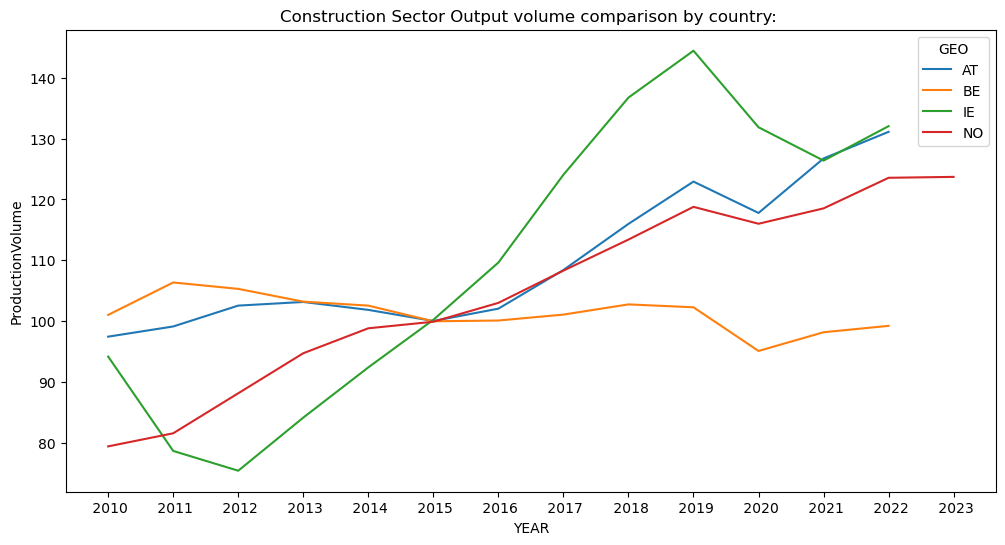

In [19]:
# Using a line plot to show leadtime over years
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x="YEAR", y="ProductionVolume", hue="GEO", data=Yearlyaverage_df, ax=ax)
ax.set_title("Construction Sector Output volume comparison by country: ")
#ax.set_xticks(range(2003, 2024))

plt.show()

In [20]:
# Check for NaN values and remove any rows containing
df_constats = df_constats.dropna()

# Create a dictionary to hold country code to country pairs
codetocountry = {"AT": "Austria", "BE": "Belgium", "IE": "Ireland", "NO": "Norway",}

# Replace country codes with country names for clarity in future visualisations
df_constats["GEO"] = df_constats["GEO"].map(codetocountry)
df_constats.head()


,GEO,PERIOD,YEAR,QUARTER,Permits,LabourInput,ProductionCost,PriceIndex,ProductionVolume
0,Austria,2010Q1,2010,Q1,72.4,87.3,88.3,74.05,97.8
1,Belgium,2010Q1,2010,Q1,116.2,98.8,91.1,90.28,101.0
2,Ireland,2010Q1,2010,Q1,115.7,98.0,97.8,111.53,99.8
3,Norway,2010Q1,2010,Q1,91.3,83.1,84.6,73.93,78.5
4,Austria,2010Q2,2010,Q2,98.1,102.6,88.8,76.54,98.9


In [21]:
# Using dash and inline capabilities to develop a dashboard based on the collected construction sector data
# Build App 
# See code references https://medium.com/plotly/introducing-jupyterdash-811f1f57c02e and https://dash.plotly.com/dash-core-components/graph 
app = JupyterDash(__name__)
app.layout = html.Div([
    html.H1("Construction sector data comparing volume, price, cost"),
    dcc.Graph(id='graph'),
    html.Label([
        "Select GEO",
        dcc.Dropdown(
            id='geo-dropdown',
            clearable=False,
            options=[{'label': geo, 'value': geo} for geo in df_constats['GEO'].unique()],
            value=df_constats['GEO'].unique()[0]
        )
    ]),
])

# Define callback to update graph
@app.callback(
    Output('graph', 'figure'),
    [Input("geo-dropdown", "value")]
)
def update_figure(geo):
    filtered_df = df_constats[df_constats['GEO'] == geo]
    fig = px.scatter(
        filtered_df, x="PriceIndex", y="ProductionCost", color="ProductionVolume",
        color_continuous_scale="oryel",
        render_mode="webgl", title="Choose a country to begin, hover to show collection period."
    )
    # Add hover information for Year & Quarter information
    fig.update_traces(hovertemplate="Year: %{customdata[0]}<br>Quarter: %{customdata[1]}<br>Price Index: %{x}<br>Production Cost: %{y}<br>Production Volume: %{marker.color}",
                      customdata=filtered_df[["YEAR", "QUARTER"]].values) 
    return fig

# Run app and display result inline in the notebook using dash
app.run_server(mode='inline')



Dash is running on http://127.0.0.1:8050/

